In [2]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api as sm
import networkx as nx
import seaborn as sns

from spikeometric.models import BernoulliGLM
from spikeometric.datasets import NormalGenerator, ConnectivityDataset
from spikeometric.stimulus import RegularStimulus

from torch_geometric.data import Data
from torch_geometric.utils import to_dense_adj, to_networkx, from_networkx
from CD_methods import SCM_learner

from tqdm import tqdm

### GOAL
- Simulate network with similar node degree to c elegans
- See if I find critical threshold for CD in the data

In [30]:
n_neurons = 279
G = nx.erdos_renyi_graph(n=n_neurons, p=0.01, directed=True)

In [31]:
#plt.figure(figsize=(4,4))
#nx.draw_networkx(G)
#plt.tight_layout()
#plt.show()

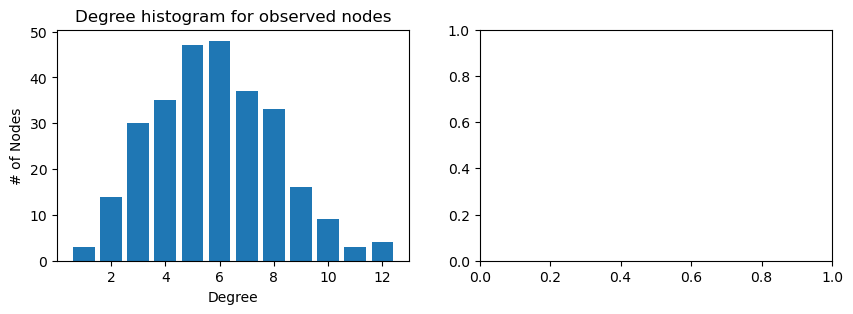

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
ax[0].bar(*np.unique(degree_sequence, return_counts=True))
ax[0].set_title("Degree histogram for observed nodes")
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("# of Nodes")
plt.show()

In [33]:
print(np.mean(degree_sequence), np.median(degree_sequence))

5.813620071684587 6.0
